In [1]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import pickle as pkl
import requests
import os
from io import BytesIO

In [2]:
def coords2display(p,
                   valbounds=[-46.702880859375, -23.569022144054955, \
                              -46.69189453125, -23.57405696664267],
                   imgsize=[512, 256]):
    pnormalized = [(p[0] - valbounds[0]) / (valbounds[2]-valbounds[0]),
                   (p[1] - valbounds[1]) / (valbounds[3]-valbounds[1])]
    pnew = [ pnormalized[0]*imgsize[0], pnormalized[1]*imgsize[1] ]
    return pnew

In [3]:
basepath = 'https://raw.githubusercontent.com/tokudaek/pinheiros-graph/master/data/'
nodesurl = os.path.join(basepath, 'pinheiros_v.pkl')
edgesurl = os.path.join(basepath, 'pinheiros_e.pkl')
imgurl = os.path.join(basepath, '37185.png')
r = requests.get(nodesurl)

nodes = pkl.loads(requests.get(nodesurl).content)
edges = pkl.loads(requests.get(edgesurl).content)
img = plt.imread(BytesIO(requests.get(imgurl).content))

(-27.0882000618169, 539.6703053772106, 269.033546415562, -14.747596601211795)

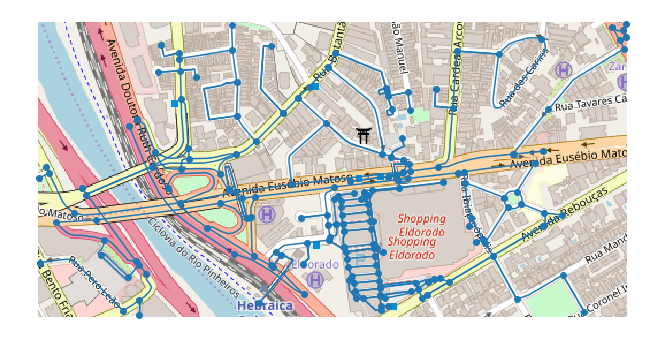

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.imshow(img)

# Nodes
xs = []
ys = []

for nod in nodes:
    x, y = coords2display(nod)
    xs.append(x)
    ys.append(y)
#     break
#     print(x)
ax.scatter(xs, ys)

# Edges
lines = []
for u, v, segments in edges:
    if segments == []:
        p0 = nodes[u]
        p0new = coords2display(nodes[u])
        p1new = coords2display(nodes[v])
        lines.append([p0new, p1new])
    else:
        xx, yy = segments
        kk = []
        for pp in zip(xx, yy):
            z = coords2display(pp)
            kk.append(z)
        lines.append(kk)
    
lc = mc.LineCollection(lines)
ax.add_collection(lc)
ax.axis('off')